In [2]:
# Import dependancies
import os
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()

In [52]:
import csv


filename = "Combined_News_DJIA.csv"
DATA_URL='Data/stocknews/'
sentences = []
labels = []
try:
    with open(DATA_URL + filename) as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
#             if ('Label' in row.keys()):
#                 row['Label'] = int(row['Label'])

            for i in range(25):
                sentences.append(str(row['Top' + str(i+1)])[1:-1])
                labels.append(row['Label'])

        csv_file.close()
    csv_file.close()
except IOError as ioerr:
    print(ioerr)



In [53]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [65]:
print(len(labels))
print(len(sentences))
print(sentences[3252])

49725
49725
"Drug giant pledges cheap medicine for world's poor, shocks industry with challenge to other 'big pharma' companies


In [55]:
vocab_size = 20000
embedding_dim = 64
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.9

train_size = int(len(sentences) * training_portion)

In [68]:
import re
# Clean up the sentences a little bit
for i, sentence in enumerate(sentences):
    if sentence[0] == '"':
        re.sub("\w+", '', sentence)
        sentences[i] = sentence[1:]

In [69]:
train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [70]:
# Import Tokenizer and pad_seq
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [71]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length,
                            padding=padding_type, truncating=trunc_type)

In [72]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length,
                            padding=padding_type, truncating=trunc_type)

In [73]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [74]:
print(training_label_seq.shape)
print(validation_label_seq.shape)

(44752, 1)
(4973, 1)


In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,349,169
Trainable params: 1,349,169
Non-trainable params: 0
_________________________________________________________________


In [79]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                   validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 44752 samples, validate on 4973 samples
Epoch 1/10
44752/44752 - 358s - loss: -6.9970e+00 - acc: 0.5346 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 2/10
44752/44752 - 336s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 3/10
44752/44752 - 5103s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 4/10
44752/44752 - 329s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 5/10
44752/44752 - 396s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 6/10
44752/44752 - 331s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 7/10
44752/44752 - 562s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 8/10
44752/44752 - 338s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5379
Epoch 9/10
44752/44752 - 348s - loss: -7.1273e+00 - acc: 0.5352 - val_loss: -7.0854e+00 - val_acc: 0.5

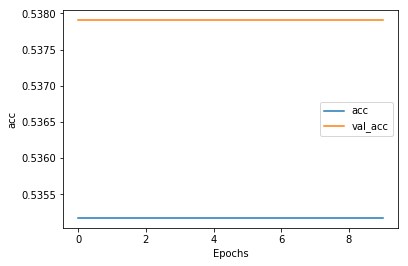

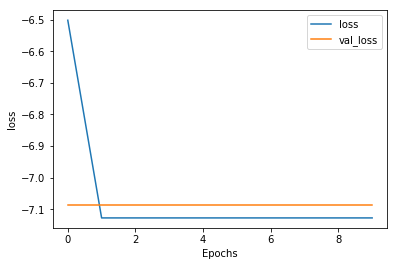

In [77]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "acc")
plot_graphs(history, "loss")
    

In [45]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])



In [46]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(20000, 64)


In [49]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [50]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')